#Data analysis project
##Group: Anders & Frederik

#The future Corona cases in Denmark

We use data from John Hopkins University originating from Statens Serum Institut.  
We use a simple exponential growth model to fit the existing Corona cases in Denmark.   
We extrapolate the model to extend 30 days ahead to get an idea of how the virus will spread if the growth continues exponentially.   
We get that the number of cases will be 37.784 by the 5th of May versus 4369 cases by the 5th of April, that is, if the number of Corona cases continues to rise exponentially.   

The data can be downloaded from this Kaggle:  
https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv

We have converted the csv-file to a xlsx-file before uploading it to our repository.  

In the blocks below, we do the following data steps:   
1: We load the data and cleans it for the purpose and we display the data.   
2: We plot the confirmed- and active cases, the recovered and the dead over time.   
3: We calculate a recovered- and death rate and we plot the rates over time.   
4: We model the growth of total cases using scipy curve and extrapolate the growth 30 days.

In [2]:
import pandas as pd
import numpy as np

#1.1 Get file from URL (our repository)
url = 'https://raw.githubusercontent.com/NumEconCopenhagen/projects-2020-anders-frederik/master/dataproject/covid_19_data.csv'
df = pd.read_csv(url, index_col=1)

#1.2 Renaming columns for the next data step
df = df.rename(columns = {"Country/Region" : "Country" , "Province/State" : "Province"})

#1.3 Keeping only Denmark while removing the provinces: Faroe Islands and Greenland
df = df[df.Country == "Denmark"]
df = df[df.Province != "Faroe Islands"]
df = df[df.Province != "Greenland"]

#1.4 Dropping unnecessary columns: "SNo", "Province", "Country" and "Last Update"
drop_cols = [0,1,2,3]
df.drop(df.columns[drop_cols], axis=1, inplace=True)

#1.5 Printing the DataFrame
df

,Confirmed,Deaths,Recovered
ObservationDate,,,
02/27/2020,1.0,0.0,0.0
02/28/2020,1.0,0.0,0.0
02/29/2020,3.0,0.0,0.0
03/01/2020,4.0,0.0,0.0
03/02/2020,4.0,0.0,0.0
03/03/2020,6.0,0.0,0.0
03/04/2020,10.0,0.0,0.0
03/05/2020,10.0,0.0,0.0
03/06/2020,23.0,0.0,1.0


We define active cases as confirmed cases minus deaths and recovered.    
We plot the confirmed- and active cases plus the deaths and recovered in Denmark.

In [3]:
#2.1 Defining active cases as the column "Active"
df["Active"] = df["Confirmed"] - df["Deaths"] - df["Recovered"]

#2.2 Plotting the confirmed- and active cases plus the deaths and recovered in Denmark.
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(10,6)).add_subplot(111)

ax.plot(df["Confirmed"], label = "Confirmed")
ax.plot(df["Active"], label = "Active")
ax.plot(df["Deaths"], label = "Deaths")
ax.plot(df["Recovered"], label = "Recovered")

plt.xticks(rotation='90')

plt.tight_layout()
ax.legend()
plt.show()

<Figure size 1000x600 with 1 Axes>

The number of active cases has been steadily climbing until recently when recovered cases started emerging in the data.

We define and plot the recovered- and the death ratio in Denmark over time.   
The death rate is equivalent to asking the question:   
"What are the chances of dying from Corona virus?"  
And opposite with the recovered rate:   
"What are the chances of surviving the Corona virus?"

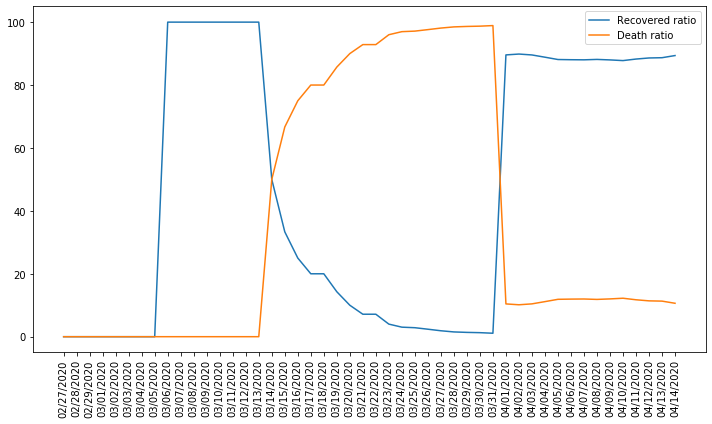

,Confirmed,Deaths,Recovered,Active,Discharged,Recovered_ratio,Death_ratio
ObservationDate,,,,,,,
02/27/2020,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000
02/28/2020,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000
02/29/2020,3.0,0.0,0.0,3.0,0.0,0.000000,0.000000
03/01/2020,4.0,0.0,0.0,4.0,0.0,0.000000,0.000000
03/02/2020,4.0,0.0,0.0,4.0,0.0,0.000000,0.000000
03/03/2020,6.0,0.0,0.0,6.0,0.0,0.000000,0.000000
03/04/2020,10.0,0.0,0.0,10.0,0.0,0.000000,0.000000
03/05/2020,10.0,0.0,0.0,10.0,0.0,0.000000,0.000000
03/06/2020,23.0,0.0,1.0,22.0,1.0,100.000000,0.000000


In [4]:
#3.1 Defining ended cases as "Discharged"
df["Discharged"] = df["Confirmed"] - df["Active"]
df["Recovered_ratio"] = df["Recovered"] * 100 / df["Discharged"]
df["Recovered_ratio"].fillna(0, inplace = True)

df["Death_ratio"] = df["Deaths"] * 100 / df["Discharged"]
df["Death_ratio"].fillna(0, inplace = True)


#3.2 Plotting the recovered- and death ratio over time
ax = plt.figure(figsize=(10,6)).add_subplot(111)

ax.plot(df["Recovered_ratio"], label = "Recovered ratio")
ax.plot(df["Death_ratio"], label = "Death ratio")


plt.xticks(rotation='90')

plt.tight_layout()
ax.legend()
plt.show()

df

The recovered rate was 100% in a time interval at the beginning of March when only one person was recovered and none dead. The 13th of March we observe the first death and the death rate quickly climbs to 99% as per the 31th of March since still only one person is registered as recovered.  
The 1st of April there was a surge of registered recovered cases and the death rate plummets to 10% as the recovered rate shoots up to 90%.

We use the exponential growth function, $f(x)=a\cdot e^{b\cdot x}+c$, to fit the confirmed cases with scipy curve_fit. Scipy.optimize.curve_fit uses a non-linaer least squares to fit a function to data.   
The program finds the minimized distances from all points of the dataset. This is done by finding the best-fit parameters for $a$, $b$ and $c$ in $f(x)$ so that the sum of squared errors are minimized.

[1.90251137e-01 1.18744945e+03]


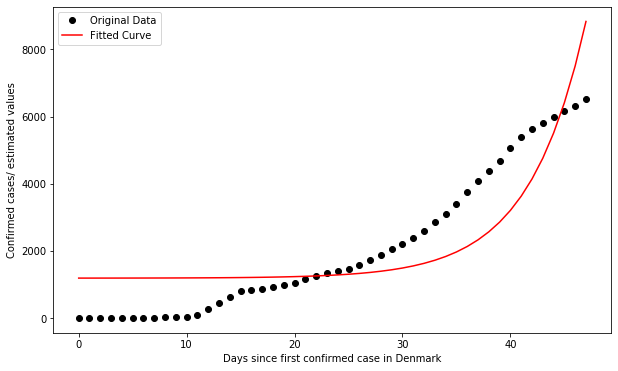

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#3.1 Defining functional form for the growth of the confirmed cases
def growth_func(x, b, c):
  return np.exp(b * x) + c

#3.2 Defining variable Y: Confirmed cases
Y = df.Confirmed.values
#3.3 Defining variable X: Number of days from length of Y (Total days of Corona virus)
X = np.arange(0, len(Y))
#3.4 Using scipy.optimize.curve_fit to define best-fit parameters for a, b and c so that the sum of squared errors are minimized
popt, pcov = curve_fit(growth_func, X, Y)
#3.5 Defining the growth function with the optimal parameters. 
      #The star in *popt unpacks the popt array so the two optimized parameter values become the second and third arguments to the function.
def growth(x):
    return growth_func(x, *popt)
print(popt)
#3.6 Plotting the confirmed cases and the fitted values with days since first confirmed case on the first axis.
plt.figure(figsize=(10,6))
plt.plot(X, Y, 'ko', label="Original Data")
plt.plot(X, growth(X), 'r-', label="Fitted Curve")
plt.legend()
plt.xlabel("Days since first confirmed case in Denmark")
plt.ylabel("Confirmed cases/ estimated values")
plt.show()

We see how the estimated values fit the data well using the optimized parameters.

We add the fitted values to the DataFrame while further extending the estimated observations in the DataFrame with 30 days.

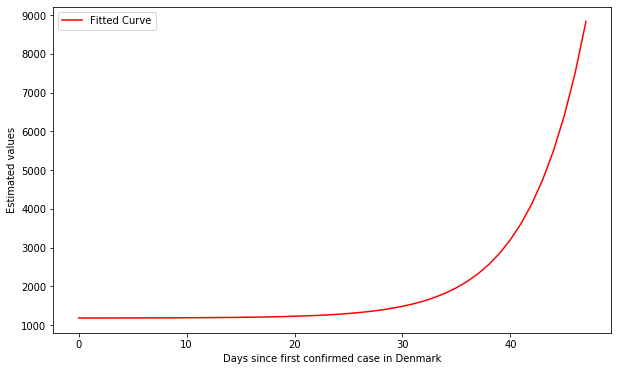

Number of days with Corona in Denmark at the 5th of April: 48.0 days
The number of cases after 30 days after the 5th of April: 2785714.7 cases
6511.0


In [48]:
plt.figure(figsize=(10,6))
X = np.arange(0, len(df))
plt.plot(X, 
         growth_func(X, *popt), 
         'r-', 
         label="Fitted Curve")
plt.legend()
plt.xlabel("Days since first confirmed case in Denmark")
plt.ylabel("Estimated values")
plt.show()
print(f'Number of days with Corona in Denmark at the 5th of April: {len(df):.1f} days')
print(f'The number of cases after 30 days after the 5th of April: {growth(len(df)+30):.1f} cases')
print(df["Confirmed"][-1])

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0, len(df), 0.1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="Day = " + str(step),
            x=np.arange(0, len(df), 0.01),
            y=growth(x*step)))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
    )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.write_html("Documents/file.html") #See the interactive graph in your documents folder

##Comment to interactive plot:
When Step=0, we interpolate the growth function (with optimal parameters) at day 0, this yields the value given by print(growth(0)) and 
When Step=10, we interpolate the growth function at day 10

##Conclusion    
We note that the estimated number of cases is 37.784 by the 5th of May. This means that the next 30 days 33.415 will be infected, which more than 7 times the number of people being infected the first 39 days!